In [1]:
from pyramid.arima import auto_arima
import util
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings
import itertools
%matplotlib inline

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


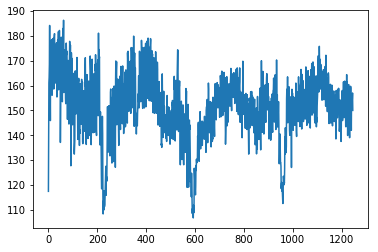

In [43]:
data, meta = util.read_arf('powersupply.arff');

data = list(map(lambda x: (x[0], x[1], int(x[2])), data))

#dates = pd.date_range('1995-01-01', '1998-12-31', freq='H')



x = list(filter(lambda x: int(x[2]) == 0, data))


dates = pd.date_range('1995-01-01', periods=len(x))


plt.plot([i for i,d in enumerate(x)], [d[0] for d in x])

plt.show()

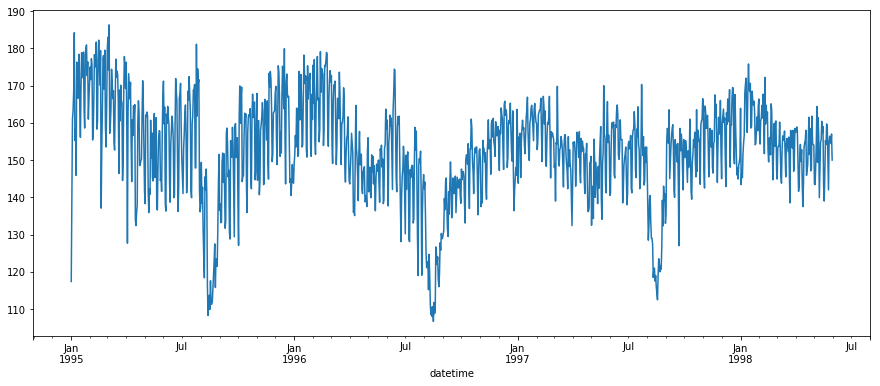

In [59]:
x = pd.DataFrame(x)
x.rename(columns={0: 'main_grid',1: 'other_grid', 2: 'hour'}, inplace=True)

len(x)
lst = list(filter(lambda x: x.hour == 0,dates))

lst = lst[:len(lst)-((len(lst) - len(x)))]

x['datetime'] = lst
x.set_index('datetime', inplace = True)

# pd.Series(x['datetime', 'Main Grid power'])


y = pd.Series(x['main_grid'])

y.plot(figsize=(15, 6))
plt.show()

In [57]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [58]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:14379.572896462203
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9682.001794426533
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10139.152290232181
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9785.1656928902
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9899.990502217803
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9658.10686730441
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:14424.499037373607
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:12903.34215906811
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9664.148678631473
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:9089.644860422159
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9690.23643765174
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:9192.781006444779
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:9364.770248465233
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:9068.412803181975
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8890.546583206973
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:8949.545144300017
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:8919.535503322912
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:8888.646400233052
ARIMA(0, 1,